In [1]:
import os

BASE_DIR = "ds_nevil_k_benny"

folders = [
    BASE_DIR,
    f"{BASE_DIR}/csv_files",
    f"{BASE_DIR}/outputs"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Folder structure created successfully")


Folder structure created successfully


In [2]:
import pandas as pd

fear_greed = pd.read_csv("/content/ds_nevil_k_benny/csv_files/fear_greed_index.csv")
trades = pd.read_csv("/content/ds_nevil_k_benny/csv_files/historical_data.csv")

fear_greed.head(), trades.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [9]:
# Convert dates
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

trades['trade_date'] = pd.to_datetime(
    trades['Timestamp IST'], dayfirst=True
).dt.date
trades['trade_date'] = pd.to_datetime(trades['trade_date'])

# Simplify sentiment
fear_greed['sentiment'] = fear_greed['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)


In [10]:
daily_trades = trades.groupby('trade_date').agg(
    total_trades=('Trade ID', 'count'),
    total_volume_usd=('Size USD', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum')
).reset_index()

daily_trades.head()


,trade_date,total_trades,total_volume_usd,avg_pnl,total_pnl
0,2023-05-01,3,477.00,0.000000,0.000000
1,2023-12-05,9,50005.83,0.000000,0.000000
2,2023-12-14,11,113203.35,-18.675885,-205.434737
3,2023-12-15,2,10609.95,-12.316017,-24.632034
4,2023-12-16,3,15348.77,0.000000,0.000000


In [5]:
merged = pd.merge(
    daily_trades,
    fear_greed[['date', 'sentiment']],
    left_on='trade_date',
    right_on='date',
    how='inner'
)

merged.head()


,trade_date,total_trades,total_volume_usd,avg_pnl,total_pnl,date,sentiment
0,2023-05-01,3,477.00,0.000000,0.000000,2023-05-01,Greed
1,2023-12-05,9,50005.83,0.000000,0.000000,2023-12-05,Greed
2,2023-12-14,11,113203.35,-18.675885,-205.434737,2023-12-14,Greed
3,2023-12-15,2,10609.95,-12.316017,-24.632034,2023-12-15,Greed
4,2023-12-16,3,15348.77,0.000000,0.000000,2023-12-16,Greed


In [6]:
sentiment_summary = merged.groupby('sentiment').agg(
    avg_daily_trades=('total_trades', 'mean'),
    avg_daily_volume=('total_volume_usd', 'mean'),
    avg_daily_pnl=('total_pnl', 'mean')
).reset_index()

sentiment_summary


,sentiment,avg_daily_trades,avg_daily_volume,avg_daily_pnl
0,Fear,792.733333,5.693420e+06,39012.054192
1,Greed,342.195187,1.586336e+06,16465.832244


In [7]:
merged.to_csv(
    "ds_nevil_k_benny/csv_files/merged_sentiment_trades.csv",
    index=False
)


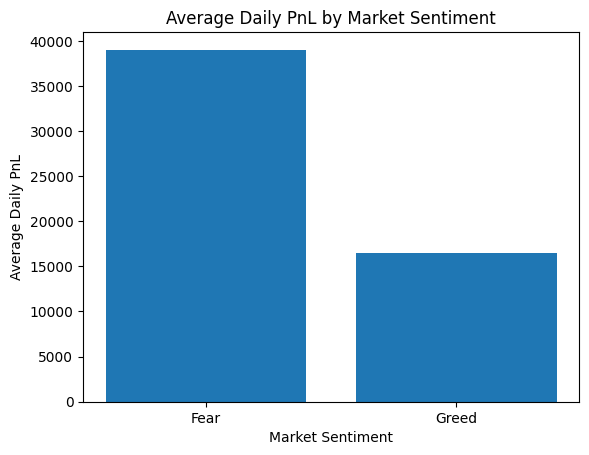

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    sentiment_summary['sentiment'],
    sentiment_summary['avg_daily_pnl']
)
plt.title("Average Daily PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Daily PnL")

plt.savefig(
    "ds_nevil_k_benny/outputs/avg_pnl_by_sentiment.png"
)
plt.savefig("ds_nevil_k_benny/outputs/avg_pnl_by_sentiment.png")
plt.show()


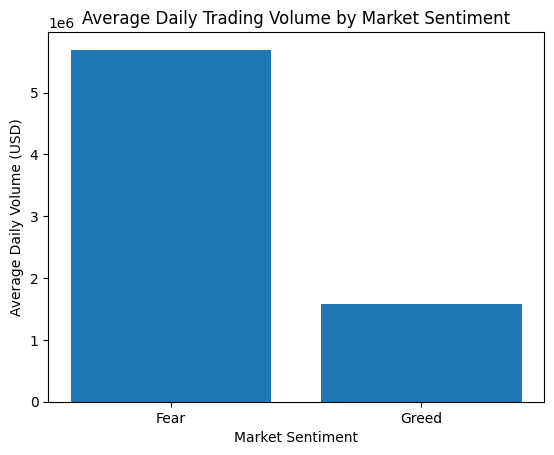

In [15]:
plt.figure()
plt.bar(
    sentiment_summary['sentiment'],
    sentiment_summary['avg_daily_volume']
)
plt.title("Average Daily Trading Volume by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Daily Volume (USD)")
plt.savefig("ds_nevil_k_benny/outputs/avg_volume_by_sentiment.png")
plt.show()


In [12]:
# PnL Volatility (Standard Deviation of Daily PnL)
pnl_volatility = merged.groupby('sentiment').agg(
    pnl_volatility=('total_pnl', 'std')
).reset_index()

pnl_volatility


,sentiment,pnl_volatility
0,Fear,96894.941505
1,Greed,62457.588945


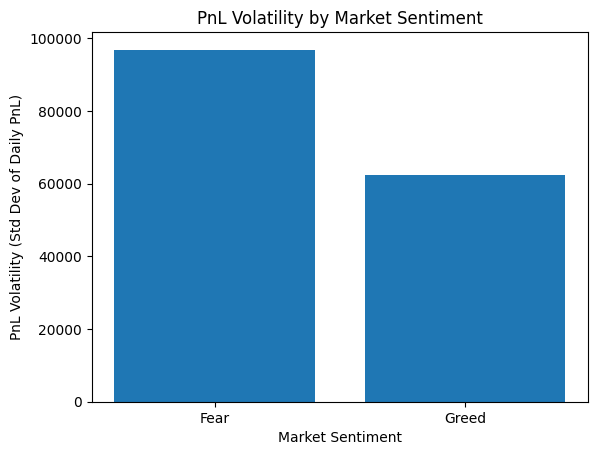

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    pnl_volatility['sentiment'],
    pnl_volatility['pnl_volatility']
)
plt.title("PnL Volatility by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("PnL Volatility (Std Dev of Daily PnL)")
plt.savefig("ds_nevil_k_benny/outputs/pnl_volatility_by_sentiment.png")
plt.show()
